### Standardization
In the unit about outliers, we saw that we can remove outliers by computing the standard scores or z-scores.

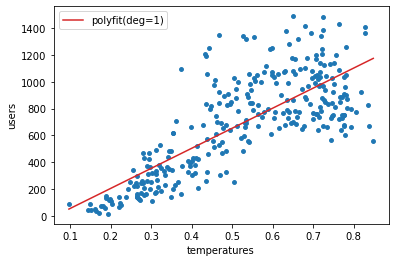

Mean: -7.058371547285764e-17
Standard deviation: 1.0


In [2]:
import pandas as pd
import numpy as np
# Load the data
data_df = pd.read_csv("c3_bike-sharing.csv")
data_df.head()
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Linear regression using polyfit
x = data_df.temp.values
y = data_df.users.values
coefs = np.polyfit(x, y, deg=1)

# Plot prediction curve
x_values = np.linspace(x.min(), x.max(), num=100)
y_values = np.polyval(coefs, x_values)
plt.scatter(x, y, s=15)
plt.plot(x_values, y_values, c="C3", label="polyfit(deg=1)")
plt.xlabel("temperatures")
plt.ylabel("users")
plt.legend()
plt.show()

from sklearn.preprocessing import scale

# Standardize x
x_standardized = scale(x)

print("Mean:", x_standardized.mean())
print("Standard deviation:", x_standardized.std())

In [3]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x_standardized + b
    error = y - y_pred
    a_grad = -2 * np.mean(x_standardized * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)

NameError: name 'rmse' is not defined

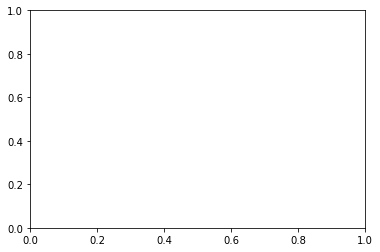

In [5]:
# Plot the error surface
def visualize_steps(fig, axis, log_a, log_b, x, y):
    # Define a grid of a,b parameters
    min_ab = min(min(log_a), min(log_b))
    max_ab = max(max(log_a), max(log_b))

    d = max_ab - min_ab
    min_ab -= d * 0.1
    max_ab += d * 0.1

    a = np.linspace(min_ab, max_ab, num=40)
    b = np.linspace(min_ab, max_ab, num=40)
    a_grid, b_grid = np.meshgrid(a, b)

    # Compute the RMSE score for each a,b pair on that grid
    rmse_grid = np.zeros_like(a_grid)

    for i in range(40):
        for j in range(40):
            a, b = a_grid[i, j], b_grid[i, j]
            rmse_grid[i, j] = rmse(a * x + b, y)

    # RMSE surface
    axis.set_aspect("equal", adjustable="box")
    mpl_contourset = axis.contourf(a_grid, b_grid, rmse_grid, 20, cmap=plt.cm.coolwarm)
    fig.colorbar(mpl_contourset, ax=axis, label="RMSE")

    # Plot the GD steps
    axis.plot(log_a, log_b, c="#00abe9")
    axis.scatter(log_a, log_b, c="#00abe9")

    # Set titles and labels
    axis.set_xlabel("parameter a")
    axis.set_ylabel("parameter b")

    axis.set_xlim(min_ab, max_ab)
    axis.set_ylim(min_ab, max_ab)
    
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x_standardized, y)